In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
def load_data(file_path):
    """Load the data from an Excel file."""
    return pd.read_excel(file_path)

def clean_numeric_columns(df, columns):
    """Clean numeric columns by converting to float and replacing invalid values with NaN."""
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

def clean_day_columns(df, day_columns):
    """Clean day columns by ensuring values are between 0 and 7."""
    for col in day_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df.loc[df[col] < 0, col] = np.nan
        df.loc[df[col] > 7, col] = 7
    return df

def generate_realistic_price(min_val, max_val):
    """Generate a realistic price within the given range."""
    value = np.random.randint(min_val, max_val + 1)
    # Round to nearest 100 if value is 1000 or more, otherwise to nearest 50
    if value >= 1000:
        return round(value / 100) * 100
    else:
        return round(value / 50) * 50

def clean_week_columns(df, week_columns, min_max_dict, rtv_peer_ratio=1.5):
    """
    Clean week columns by generating random values within specified ranges.
    Ensure RTV averages are higher than PEER averages by a specified ratio.
    Set week value to 0 when corresponding days value is 0.
    
    :param rtv_peer_ratio: The minimum ratio of RTV average to PEER average
    """
    for col in week_columns:
        min_val, max_val = min_max_dict.get(col, (0, 10000))  # Default range if not specified
        days_col = col.replace('_week', '_days')
        
        # Set week value to 0 when days value is 0
        df.loc[df[days_col] == 0, col] = 0
        
        # Generate values for non-zero entries
        mask_peer = (df['STA'] == 'PEER') & (df[days_col] != 0)
        mask_rtv = (df['STA'] == 'RTV') & (df[days_col] != 0)
        
        df.loc[mask_peer, col] = [generate_realistic_price(min_val, max_val) for _ in range(mask_peer.sum())]
        
        # Generate RTV values to ensure the average is higher by the specified ratio
        while True:
            df.loc[mask_rtv, col] = [generate_realistic_price(min_val, max_val) for _ in range(mask_rtv.sum())]
            peer_avg = df.loc[mask_peer, col].mean()
            rtv_avg = df.loc[mask_rtv, col].mean()
            if rtv_avg >= peer_avg * rtv_peer_ratio:
                break
    
    return df

file_path = "spending.xlsx"
df = load_data(file_path)

print(df.shape)
df.head()

(14015, 48)


,expenditure_start,cereals_week,cereals_days,tubers_week,tubers_days,pulses_week,pulses_days,milk_week,milk_days,vegetables_week,...,alcohol_week,alcohol_check,tobacco_week,tobacco_check,consump_food_gift_week,consump_food_gift_check,consump_inkind_week,consump_inkind_week_check,expenditure_end,STA
0,534.0,9000,3,0,3,0,6,0,0,0,...,5000,NaN,0,NaN,0,NaN,0,NaN,655.0,PEER
1,1262.0,4500,3,0,4,12000,6,0,0,0,...,0,NaN,0,NaN,0,NaN,0,NaN,1386.0,PEER
2,947.0,4500,3,0,3,6000,6,0,0,0,...,0,NaN,0,NaN,0,NaN,0,NaN,1143.0,PEER
3,731.0,15000,2,3000,3,6000,2,0,0,0,...,0,NaN,0,NaN,0,NaN,0,NaN,957.0,PEER
4,1161.0,5000,2,3000,4,3000,5,0,0,1000,...,0,NaN,0,NaN,25000,NaN,0,NaN,1338.0,PEER


In [55]:
# numeric_columns = []
day_columns = [col for col in df.columns if col.endswith('_days')]
week_columns = [col for col in df.columns if col.endswith('_week')]
check_columns = [col for col in df.columns if col.endswith('_check') or col.endswith('_chk')]

In [56]:
# Specify min and max values for each _week column
min_max_dict = {
    'cereals_week': (1000, 10000),
    'tubers_week': (1000, 15000),
    'pulses_week': (1000, 11000),
    'milk_week': (1000, 15000),
    'vegetables_week': (1000, 5500),
    'fruits_week': (1000, 7000),
    'meat_poultry_offals_week': (2000, 8500),
    'fish_week': (10000, 17000),
    'sugar_week': (2000, 4000),
    'fat_oils_week': (1000, 3000),
    'misc_week': (1000, 8000),
    'snacks_week': (1000, 3000)
}


In [57]:
# Clean numeric columns
# df = clean_numeric_columns(df, numeric_columns)

# Clean day columns
# df = clean_day_columns(df, day_columns)

In [58]:
# Clean week columns
df = clean_week_columns(df, week_columns, min_max_dict)

KeyboardInterrupt: 

In [51]:
# Clean check columns
df = clean_check_columns(df, check_columns)

print(df.shape)
df.head()

(14015, 48)


,expenditure_start,cereals_week,cereals_days,tubers_week,tubers_days,pulses_week,pulses_days,milk_week,milk_days,vegetables_week,...,alcohol_week,alcohol_check,tobacco_week,tobacco_check,consump_food_gift_week,consump_food_gift_check,consump_inkind_week,consump_inkind_week_check,expenditure_end,STA
0,534.0,3000,3,2000,3,6200,6,7500,0,2100,...,7800,NaN,4300,NaN,3700,NaN,350,NaN,655.0,PEER
1,1262.0,2600,3,14600,4,4300,6,6100,0,2900,...,800,NaN,3900,NaN,6600,NaN,550,NaN,1386.0,PEER
2,947.0,9900,3,12600,3,9300,6,9700,0,4000,...,4800,NaN,3400,NaN,7000,NaN,7300,NaN,1143.0,PEER
3,731.0,7700,2,13500,3,6100,2,12400,0,3000,...,9000,NaN,3900,NaN,500,NaN,6300,NaN,957.0,PEER
4,1161.0,8200,2,10300,4,1700,5,1900,0,2500,...,8100,NaN,8500,NaN,7200,NaN,5900,NaN,1338.0,PEER


In [53]:
# Compare PEER and RTV averages for _week columns
for col in week_columns:
    peer_avg = df[df['STA'] == 'PEER'][col].mean()
    rtv_avg = df[df['STA'] == 'RTV'][col].mean()
    print(f"{col}:")
    print(f"  PEER average: {peer_avg:.2f}")
    print(f"  RTV average: {rtv_avg:.2f}")
    print(f"  Difference: {rtv_avg - peer_avg:.2f}")
    print()

cereals_week:
  PEER average: 5555.97
  RTV average: 5556.18
  Difference: 0.20

tubers_week:
  PEER average: 7967.61
  RTV average: 8009.65
  Difference: 42.04

pulses_week:
  PEER average: 6000.47
  RTV average: 6012.89
  Difference: 12.41

milk_week:
  PEER average: 8066.76
  RTV average: 8082.20
  Difference: 15.44

vegetables_week:
  PEER average: 3238.99
  RTV average: 3243.82
  Difference: 4.83

fruits_week:
  PEER average: 4016.92
  RTV average: 4027.28
  Difference: 10.37

fish_week:
  PEER average: 13490.47
  RTV average: 13535.79
  Difference: 45.31

sugar_week:
  PEER average: 3014.87
  RTV average: 3015.66
  Difference: 0.79

fat_oils_week:
  PEER average: 1988.46
  RTV average: 2003.94
  Difference: 15.48

misc_week:
  PEER average: 4560.31
  RTV average: 4561.35
  Difference: 1.04

snacks_week:
  PEER average: 2019.65
  RTV average: 2020.19
  Difference: 0.53

alcohol_week:
  PEER average: 5080.99
  RTV average: 5085.53
  Difference: 4.54

tobacco_week:
  PEER average: 5

In [15]:
pwd

'/Users/rtv-lpt-127/morris/git/2022_cohort'

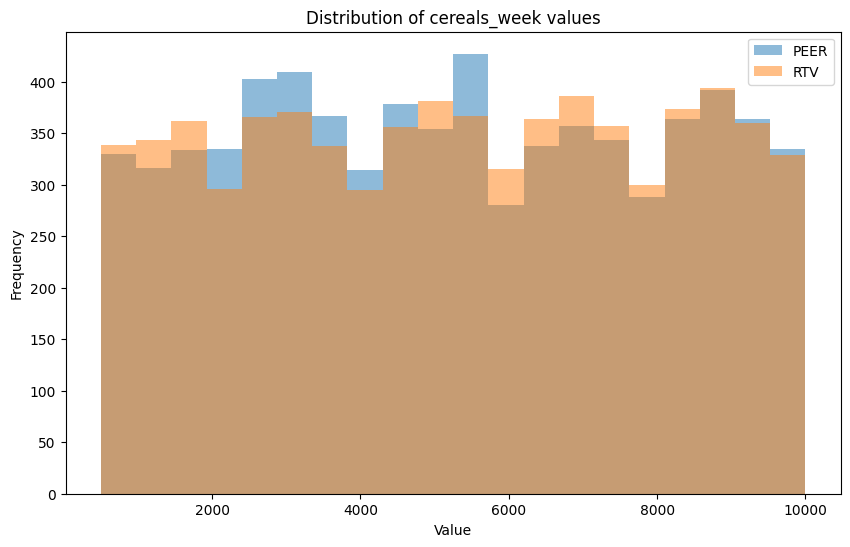

Cleaned data saved to spending.xlsx


In [16]:
# Plot distribution of values for a selected _week column
selected_column = 'cereals_week'  # Change this to visualize different columns

plt.figure(figsize=(10, 6))
plt.hist(df[df['status'] == 'PEER'][selected_column], bins=20, alpha=0.5, label='PEER')
plt.hist(df[df['status'] == 'RTV'][selected_column], bins=20, alpha=0.5, label='RTV')
plt.title(f'Distribution of {selected_column} values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# %% [markdown]
# ## Save the cleaned data

# %%
output_file_path = file_path.replace('.csv', '_cleaned.csv')
df.to_csv("clean.csv", index=False)
print(f"Cleaned data saved to {output_file_path}")

In [63]:
week = pd.read_excel("spendi.xlsx")

In [80]:
import pandas as pd
import numpy as np

# Function to update week column based on conditions
def update_week_column(df, week_column, day_column=None, min_week=1000, max_week=15000):
    # Generate normal prices as multiples of 1000 or 500
    def generate_normal_price():
        return np.random.choice([1000, 500]) * np.random.randint(min_week // 1000, (max_week // 1000) + 1)

    # Check if the day column exists
    if day_column in df.columns:
        # Condition 1: Update 'week_column' if it's outside the range [min_week, max_week]
        df[week_column] = df.apply(
            lambda row: generate_normal_price() if (row[week_column] != 0 and (row[week_column] < min_week or row[week_column] > max_week)) else row[week_column], 
            axis=1
        )
        
        # Condition 2: Set 'week_column' to 0 if 'day_column' is 0
        df.loc[df[day_column] == 0, week_column] = 0
    else:
        # If day_column doesn't exist, just update out-of-range non-zero week values
        df[week_column] = df.apply(
            lambda row: generate_normal_price() if (row[week_column] != 0 and (row[week_column] < min_week or row[week_column] > max_week)) else row[week_column], 
            axis=1
        )

In [73]:
# df = pd.DataFrame(data)

# Call the function to update 'tubers_week'
update_week_column(week, 'meat_poultry_offals', 'meat_poultry_offals_days', min_week=1000, max_week=15000)

In [74]:
update_week_column(week, 'eggs', 'eggs_days', min_week=1000, max_week=8000)

In [75]:
update_week_column(week, 'fish_week', 'fish_days', min_week=8000, max_week=15000)

In [76]:
update_week_column(week, 'sugar_week', 'sugar_days', min_week=2000, max_week=5000)

In [77]:
update_week_column(week, 'fat_oils_week', 'fat_oils_days', min_week=2000, max_week=5000)

In [78]:
update_week_column(week, 'misc_week', 'misc_days', min_week=2000, max_week=7000)

In [79]:
update_week_column(week, 'snacks_week', 'snacks_days', min_week=500, max_week=4000)

In [81]:
update_week_column(week, 'alcohol_week', 'alcohol_days', min_week=500, max_week=5000)

In [85]:
update_week_column(week, 'consump_food_gift_week', 'consump_food_gift_days', min_week=500, max_week=3000)

In [86]:
update_week_column(week, 'consump_inkind_week', 'consump_inkind_week_days', min_week=500, max_week=4000)

In [87]:
week.to_csv("weekly_consumption.csv", index=False)

## Monthly Spending

In [88]:
monthly = pd.read_excel("spendi.xlsx", sheet_name="monthly")

In [90]:
update_week_column(monthly, 'expenditure_Fuel_lighting', min_week=5000, max_week=30000)

In [92]:
monthly.columns

Index(['expenditure_Fuel_lighting', 'expenditure_Utilities',
       'expenditure_Phone_credit', 'expenditure_Transport',
       'expenditure_washing_cleaning_products',
       'expenditure_Rent_paid_homestead'],
      dtype='object')

In [93]:
update_week_column(monthly, 'expenditure_Utilities', min_week=5000, max_week=30000)

In [94]:
update_week_column(monthly, 'expenditure_Phone_credit', min_week=500, max_week=10000)

In [95]:
update_week_column(monthly, 'expenditure_Transport', min_week=3000, max_week=25000)

In [96]:
update_week_column(monthly, 'expenditure_washing_cleaning_products', min_week=2000, max_week=8000)

In [97]:
update_week_column(monthly, 'expenditure_Rent_paid_homestead', min_week=30000, max_week=50000)

In [98]:
monthly.to_csv('/Users/rtv-lpt-127/Desktop/data cleaning/consumption/monthly_consumption.csv', index=False)

## Annual Spending

In [100]:
annually = pd.read_excel("spendi.xlsx", sheet_name="annually")

In [101]:
annually.columns

Index(['expenditure_durable_products', 'expenditure_clothing_women',
       'expenditure_clothing_men', 'expenditure_clothing_children_girls',
       'expenditure_clothing_children_boys', 'expenditure_Medical_care',
       'expenditure_Maintenance_house', 'expenditure_Improvements_home',
       'expenditure_Household_items', 'expenditure_Gifts',
       'expenditure_Recreation'],
      dtype='object')

In [102]:
update_week_column(annually, 'expenditure_durable_products', min_week=5000, max_week=60000)

In [103]:
update_week_column(annually, 'expenditure_clothing_women', min_week=10000, max_week=50000)

In [105]:
update_week_column(annually, 'expenditure_clothing_children_girls', min_week=10000, max_week=40000)

In [106]:
update_week_column(annually, 'expenditure_clothing_children_boys', min_week=10000, max_week=40000)

In [107]:
update_week_column(annually, 'expenditure_Medical_care', min_week=15000, max_week=50000)

In [108]:
update_week_column(annually, 'expenditure_Maintenance_house', min_week=8000, max_week=80000)

In [109]:
update_week_column(annually, 'expenditure_Improvements_home', min_week=8000, max_week=45000)

In [110]:
update_week_column(annually, 'expenditure_Household_items', min_week=5000, max_week=100000)

In [111]:
update_week_column(annually, 'expenditure_Gifts', min_week=1000, max_week=15000)

In [112]:
update_week_column(annually, 'expenditure_Recreation', min_week=10000, max_week=50000)

In [113]:
annually.to_csv('/Users/rtv-lpt-127/Desktop/data cleaning/consumption/annual_consumption.csv', index=False)

## Farm Expenses

In [114]:
farm = pd.read_excel("spendi.xlsx", sheet_name="farm")

In [116]:
farm.columns

Index(['farming_inputs1_expenses', 'farming_inputs2_expenses',
       'farming_inputs3_expenses', 'farming_inputs4_expenses',
       'farming_inputs5_expenses', 'farming_inputs6_expenses',
       'farming_inputs7_expenses', 'farming_inputs8_expenses',
       'farming_inputsother_expenses', 'organic_inputs', 'organic_inputs_1',
       'organic_inputs_2', 'organic_inputs_3', 'organic_inputs_4',
       'organic_inputs_5', 'organic_inputs_6', 'organic_inputs_99',
       'organic1_expenses', 'organic2_expenses', 'organic3_expenses',
       'organic4_expenses', 'organic5_expenses', 'organic6_expenses',
       'bags_storage_expenses', 'formal_agriculturalinsurance_expenses',
       'formal_transport_farm_expenses'],
      dtype='object')

In [118]:
farm.head()

,farming_inputs1_expenses,farming_inputs2_expenses,farming_inputs3_expenses,farming_inputs4_expenses,farming_inputs5_expenses,farming_inputs6_expenses,farming_inputs7_expenses,farming_inputs8_expenses,farming_inputsother_expenses,organic_inputs,...,organic_inputs_99,organic1_expenses,organic2_expenses,organic3_expenses,organic4_expenses,organic5_expenses,organic6_expenses,bags_storage_expenses,formal_agriculturalinsurance_expenses,formal_transport_farm_expenses
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000.0,0.0,15000.0


In [117]:
update_week_column(farm, 'farming_inputs1_expenses', min_week=30000, max_week=60000)

In [119]:
update_week_column(farm, 'farming_inputs2_expenses', min_week=5000, max_week=30000)

In [120]:
update_week_column(farm, 'farming_inputs3_expenses', min_week=5000, max_week=30000)

In [121]:
update_week_column(farm, 'farming_inputs4_expenses', min_week=50000, max_week=100000)

In [122]:
update_week_column(farm, 'farming_inputs5_expenses', min_week=20000, max_week=50000)

In [123]:
update_week_column(farm, 'farming_inputs6_expenses', min_week=5000, max_week=20000)

In [124]:
update_week_column(farm, 'farming_inputs7_expenses', min_week=5000, max_week=45000)

In [125]:
update_week_column(farm, 'farming_inputs8_expenses', min_week=5000, max_week=20000)

In [126]:
update_week_column(farm, 'farming_inputsother_expenses', min_week=5000, max_week=15000)

In [127]:
update_week_column(farm, 'organic_inputs_1', min_week=5000, max_week=15000)

In [128]:
update_week_column(farm, 'organic_inputs_2', min_week=2000, max_week=25000)

In [129]:
update_week_column(farm, 'organic_inputs_3', min_week=2000, max_week=25000)

In [130]:
update_week_column(farm, 'organic_inputs_4', min_week=2000, max_week=30000)

In [131]:
update_week_column(farm, 'organic_inputs_5', min_week=2000, max_week=30000)

In [132]:
update_week_column(farm, 'organic_inputs_6', min_week=2000, max_week=30000)

In [133]:
update_week_column(farm, 'bags_storage_expenses', min_week=2000, max_week=20000)

In [134]:
update_week_column(farm, 'formal_agriculturalinsurance_expenses', min_week=5000, max_week=80000)

In [135]:
update_week_column(farm, 'formal_transport_farm_expenses', min_week=5000, max_week=100000)

In [136]:
farm.to_csv('/Users/rtv-lpt-127/Desktop/data cleaning/consumption/farm_consumption.csv', index=False)

Education expenses

In [137]:
# Define the valid tuition ranges for each education level, with realistic values
tuition_ranges = {
    1: (40000, 80000),     
    2: (50000, 100000),
    3: (100000, 200000),
    4: (150000, 300000),
    5: (200000, 400000),
    6: (250000, 450000),
    7: (300000, 500000),
    8: (350000, 600000),
    9: (400000, 700000),
    10: (450000, 800000),
    11: (500000, 900000),
    12: (550000, 1000000),
    13: (600000, 1100000),
    14: (650000, 1200000),
    15: (700000, 1300000),
    16: (750000, 1400000),
    17: (800000, 1500000),
    18: (850000, 1600000),
    19: (900000, 1700000)
}

# Define valid ranges for school supplies
supplies_ranges = {
    1: (1000, 5000),     
    2: (1000, 10000),
    3: (1000, 15000),
    4: (2000, 20000),
    5: (3000, 25000),
    6: (5000, 30000),
    7: (5000, 35000),
    8: (5000, 40000),
    9: (5000, 45000),
    10: (6000, 50000),
    11: (6000, 60000),
    12: (7000, 70000),
    13: (7000, 80000),
    14: (8000, 90000),
    15: (9000, 100000),
    16: (10000, 110000),
    17: (10000, 120000),
    18: (11000, 130000),
    19: (12000, 140000)
}

In [146]:
def clean_fees_and_supplies(df, tuition_column, supplies_column, education_column):
    def update_value(row, ranges, column, valid_prices):
        educ_level = row[education_column]
        if pd.isna(row[column]):
            return np.nan
        
        min_value, max_value = ranges.get(educ_level, (0, 0))
        valid_in_range = [price for price in valid_prices if min_value <= price <= max_value]
        
        if len(valid_in_range) > 0:
            return np.random.choice(valid_in_range)
        else:
            return min_value

    df[tuition_column] = df.apply(
        lambda row: update_value(row, tuition_ranges, tuition_column, [40000, 50000, 100000, 200000, 300000, 400000, 500000]), axis=1
    )
    df[supplies_column] = df.apply(
        lambda row: update_value(row, supplies_ranges, supplies_column, [1000, 5000, 10000, 20000, 30000, 40000]), axis=1
    )

In [147]:
education = pd.read_excel("spendi.xlsx", sheet_name="educ")

In [149]:
# Clean both tuition and school supplies data
clean_fees_and_supplies(education, 'tuition_hh_contr_member1', 'sch_supplies_member1', 'member1_educ_level')

In [151]:
# Clean both tuition and school supplies data
clean_fees_and_supplies(education, 'tuition_hh_contr_member2', 'sch_supplies_member2', 'member2_educ_level')

In [152]:
# Clean both tuition and school supplies data
clean_fees_and_supplies(education, 'tuition_hh_contr_member3', 'sch_supplies_member3', 'member3_educ_level')

In [153]:
# Clean both tuition and school supplies data
clean_fees_and_supplies(education, 'tuition_hh_contr_member4', 'sch_supplies_member4', 'member4_educ_level')

In [154]:
# Clean both tuition and school supplies data
clean_fees_and_supplies(education, 'tuition_hh_contr_member5', 'sch_supplies_member5', 'member5_educ_level')

In [155]:
# Clean both tuition and school supplies data
clean_fees_and_supplies(education, 'tuition_hh_contr_member6', 'sch_supplies_member6', 'member6_educ_level')

In [156]:
# Clean both tuition and school supplies data
clean_fees_and_supplies(education, 'tuition_hh_contr_member7', 'sch_supplies_member7', 'member7_educ_level')

In [157]:
# Clean both tuition and school supplies data
clean_fees_and_supplies(education, 'tuition_hh_contr_member8', 'sch_supplies_member8', 'member8_educ_level')

In [158]:
education.to_csv('/Users/rtv-lpt-127/Desktop/data cleaning/consumption/educ.csv', index=False)

In [ ]:
# Show updated DataFrame
print(df)